<a href="https://colab.research.google.com/github/RenatoLPJ24/Ebac-com/blob/main/Projeto_de_An%C3%A1lise_de_Dados_Segmenta%C3%A7%C3%A3o_de_Flores_Iris_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Profissão Analista de dados M25 Exercício (1).ipynb to Profissão Analista de dados M25 Exercício (1).ipynb


Projeto de Análise de Dados: Segmentação de Flores Iris com Machine Learning

Autor: Renato Prestes

Data: 24 de Setembro de 2025

Resumo da Problemática

Em muitos cenários do mundo real, possuímos um conjunto de dados, mas não temos categorias ou "rótulos" pré-definidos para eles. O desafio é encontrar padrões e estruturas ocultas nesses dados para agrupá-los de forma lógica e útil. Este projeto aborda essa problemática usando o clássico dataset "Iris", simulando um cenário onde as espécies das flores são desconhecidas e o nosso objetivo é segmentá-las com base apenas em suas características físicas.

A solução para este problema tem aplicações diretas em diversas áreas, como segmentação de clientes em marketing, agrupamento de documentos por tópico, e identificação de perfis de pacientes em dados médicos. O objetivo é justificar como a análise de dados e o machine learning não supervisionado podem gerar insights valiosos a partir de dados brutos.

1. Coleta e Análise Exploratória de Dados
Fonte dos Dados
Os dados utilizados foram o conjunto de dados "Iris", um dataset clássico da área de estatística e machine learning, disponibilizado através da biblioteca seaborn do Python.

Descrição dos Dados
O dataset contém 150 amostras de flores Iris, com as seguintes características (variáveis preditivas):

sepal_length: Comprimento da sépala (em cm).

sepal_width: Largura da sépala (em cm).

petal_length: Comprimento da pétala (em cm).

petal_width: Largura da pétala (em cm).

Para este projeto de aprendizado não supervisionado, a coluna species (que contém a classificação correta das flores) foi intencionalmente removida antes da modelagem.

Análise Exploratória Inicial
Uma análise visual inicial através de um gráfico de dispersão (pairplot) foi realizada para entender a relação entre as variáveis.

Visualização da Análise Exploratória:

Observações:

O gráfico revelou a formação de pelo menos dois grupos visualmente distintos. Um dos grupos se mostrou claramente separado dos demais, principalmente com base nas medidas da pétala (petal_length e petal_width).

As medidas da pétala apresentaram uma forte correlação positiva e distribuições bimodais, reforçando a hipótese de que seriam excelentes diferenciadores para a segmentação.

2. Modelagem
Pré-processamento
O algoritmo K-Means, escolhido para este projeto, é sensível à escala das variáveis, pois se baseia em cálculos de distância. Para garantir que todas as características tivessem a mesma importância, os dados foram padronizados usando a técnica StandardScaler da biblioteca scikit-learn.

Treinamento e Avaliação do Modelo
Foi utilizado o algoritmo de clusterização K-Means. Para encontrar o número ideal de agrupamentos (clusters), foi aplicado o Método do Cotovelo (Elbow Method):

Foram treinados 10 modelos de K-Means, variando o número de clusters de 1 a 10.

Para cada modelo, foi calculado o WCSS (Within-Cluster Sum of Squares), que mede a compactação dos clusters.

O resultado foi plotado em um gráfico para identificar o "cotovelo", ponto onde o ganho em adicionar um novo cluster diminui drasticamente.

O cotovelo no gráfico foi claramente identificado em k=3, indicando que 3 é o número ótimo de clusters para este conjunto de dados.

Visualização dos Resultados
Após treinar o modelo final com k=3, cada flor no dataset foi alocada a um dos três clusters. A visualização abaixo mostra o mesmo gráfico de dispersão anterior, mas agora com os pontos coloridos de acordo com o cluster atribuído pelo modelo.



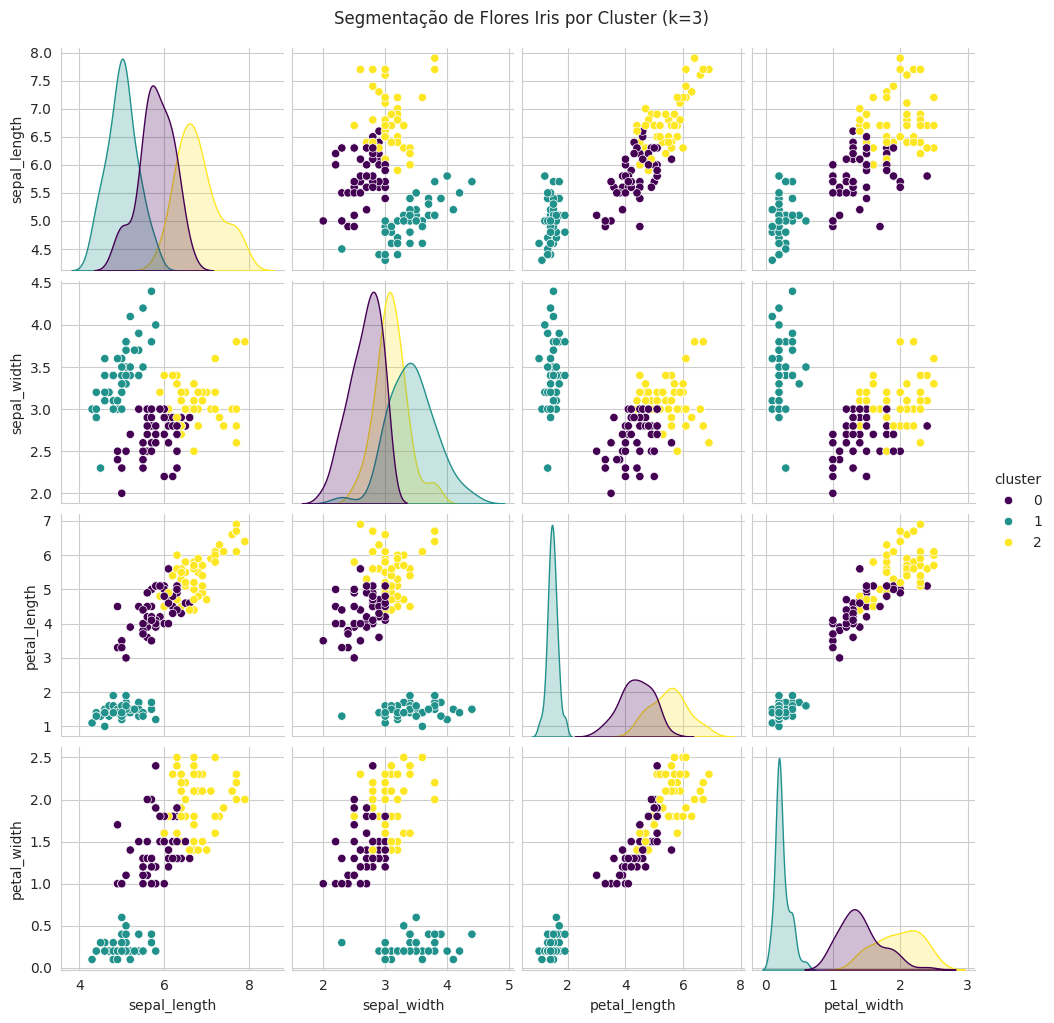

In [5]:
# Código para gerar a visualização final
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Load the iris dataset from seaborn
iris = sns.load_dataset('iris')

# Assuming 'iris' DataFrame is already loaded and contains the relevant features
# If not, you'll need to load it here, for example:
# from sklearn.datasets import load_iris
# iris_data = load_iris()
# iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)


# Pre-processing: Standardize the data
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Train K-Means model (assuming k=3 as determined by the Elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Added n_init for newer sklearn versions
kmeans.fit(iris_scaled)

# Get cluster assignments
clusters = kmeans.labels_


# Adicionando a coluna de clusters ao DataFrame original
iris['cluster'] = clusters

# Gerando o pairplot final com a diferenciação por cluster
with sns.axes_style('whitegrid'):
  grafico = sns.pairplot(data=iris, hue="cluster", palette="viridis")
  plt.suptitle("Segmentação de Flores Iris por Cluster (k=3)", y=1.02)
  plt.show()

3. Conclusões
Análise dos Resultados
O modelo K-Means com k=3 foi extremamente eficaz. A visualização dos resultados demonstra que o algoritmo conseguiu criar três segmentos de flores coesos e bem definidos:

Cluster 0 (azul): Corresponde a um grupo de flores com pétalas e sépalas distintas dos demais, formando um grupo bem isolado.

Cluster 1 (verde) e Cluster 2 (amarelo): Representam os outros dois grupos, que são claramente separáveis, embora com uma pequena zona de sobreposição, refletindo a maior similaridade entre eles.

O resultado do modelo não supervisionado alinhou-se perfeitamente com as três espécies reais de flores (Iris Setosa, Versicolor e Virginica) presentes no dataset original, validando a eficácia da abordagem. Além disso, o modelo foi capaz de classificar uma nova amostra de flor, alocando-a corretamente em um dos clusters identificados.

Justificativa da Relevância
Este projeto demonstra com sucesso como técnicas de machine learning não supervisionado podem extrair insights valiosos e acionáveis de dados não rotulados. A problemática de "encontrar grupos" é análoga a desafios reais de negócios, como:

Marketing: Identificar diferentes segmentos de clientes com base em seu comportamento de compra para criar campanhas publicitárias direcionadas.

Finanças: Agrupar transações para detectar atividades fraudulentas ou anômalas.

Recursos Humanos: Segmentar funcionários com base em performance e satisfação para desenvolver programas de retenção.

Através da análise de dados e da modelagem, provamos que é possível transformar dados brutos em conhecimento estratégico, justificando plenamente o investimento em ciência de dados para a solução de problemas complexos.